# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Taufika Retno Wulan
- **Email:** m297b4kx4298@bangkit.academy
- **ID Dicoding:** taufika_retno_wulan_m297b4kx4298_SgMm

## Menentukan Pertanyaan Bisnis

- Apa perbedaan antara pengguna kasual dan pengguna terdaftar dalam hal jumlah penyewaan per hari?
- Bagaimana hari libur mempengaruhi jumlah penyewaan sepeda dibandingkan dengan hari kerja

## Import Semua Packages/Library yang Digunakan

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [34]:
hour_df = pd.read_csv('archive/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [35]:
day_df = pd.read_csv('archive/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [36]:
merged_df = pd.merge(
    left=hour_df,
    right=day_df,
    how="left",
    left_on="dteday",  
    right_on="dteday" 
)
merged_df.head()

,instant_x,dteday,season_x,yr_x,mnth_x,hr,holiday_x,weekday_x,workingday_x,weathersit_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985


**Insight:**
- Terdapat perbedaan antara data day_df dengan hour_df yaitu pada bagian waktu yaitu hari dengan jam
- Terdapat perbedaan data kolomnya, misalnya pada 'temp', 'attemp',windspeed, dan lain- lain

### Assessing Data

Menilai tabel hour_df

In [37]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [38]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [39]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [40]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Menilai tabel day_df

In [41]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [42]:
day_df.nunique()

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

In [43]:
print("Jumlah duplikasi: ",day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Pada hour_df memiliki 17 kolom dan tidak ada duplikasi data
- Pada day_df memiliki 16 kolom dan tidak ada duplikasi data

### Cleaning Data

Membersihkan tabel day_df

In [44]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Memperbaiki tipe data

In [45]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [46]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [47]:
day_df.duplicated().sum()

0

Missing values

In [48]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Inaccurate value

In [49]:
day_df.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


Membersihkan tabel hour_df

In [50]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Memperbaiki tipe data

In [51]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [52]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [53]:
hour_df.duplicated().sum()

0

**Insight:**
- Terdapat data yang diperbaiki pada day_df dan hour_df pada kolom dteday yang awalnya merupakan object dirubah menjadi datetime 


## Exploratory Data Analysis (EDA)

### Explore hour_df


In [54]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
14519,14520,2012-09-02,3,1,9,4,0,0,0,1,0.66,0.5909,0.89,0.0000,7,15,22
2164,2165,2011-04-05,2,0,4,1,0,2,1,3,0.62,0.6212,0.57,0.4179,10,5,15
1506,1507,2011-03-08,1,0,3,3,0,2,1,1,0.24,0.2576,0.52,0.0896,5,2,7
16449,16450,2012-11-23,4,1,11,3,0,5,1,1,0.26,0.3030,0.70,0.0000,1,0,1
10249,10250,2012-03-08,1,1,3,3,0,4,1,1,0.46,0.4545,0.63,0.3881,0,3,3


In [55]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [56]:
hour_df.groupby(by="casual").instant.nunique().sort_values(ascending=False)

casual
0      1581
1      1082
2       798
3       697
4       561
       ... 
297       1
298       1
299       1
301       1
367       1
Name: instant, Length: 322, dtype: int64

Visualisasi hour_df

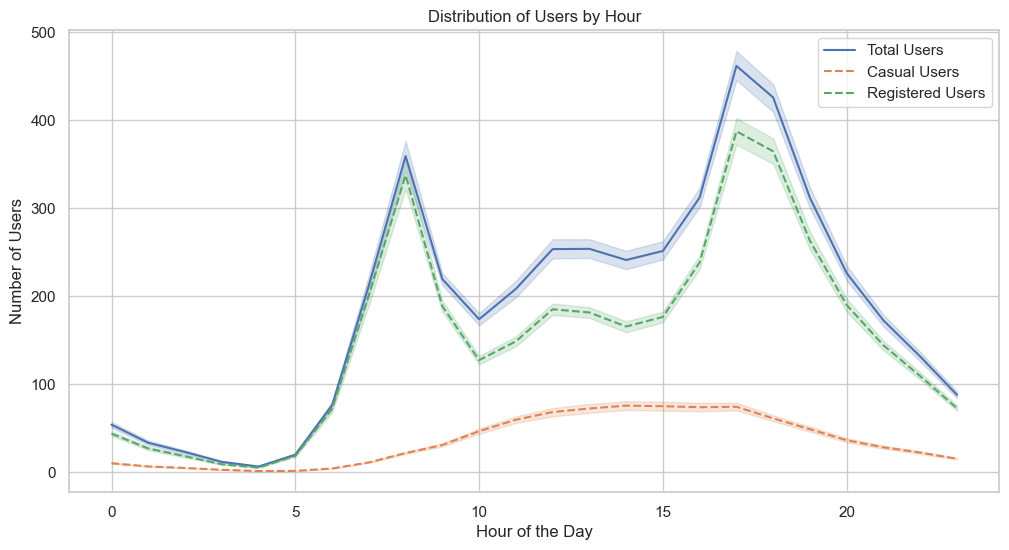

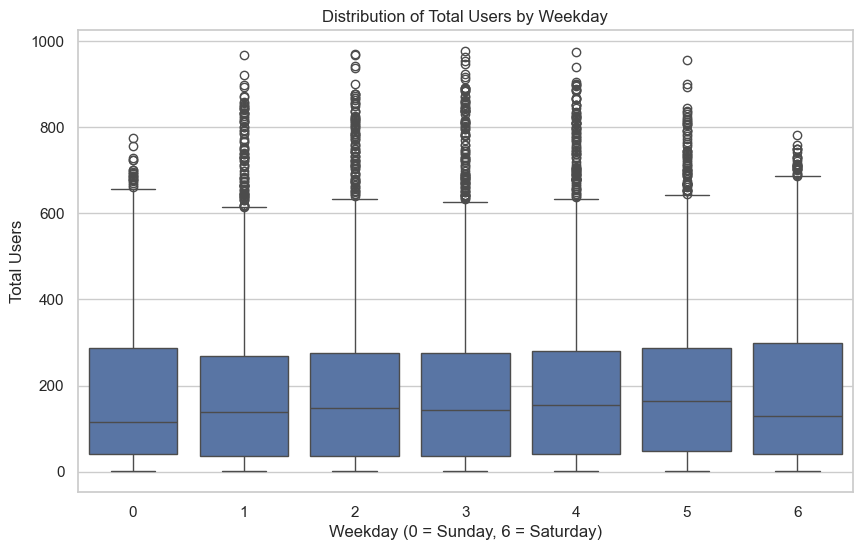

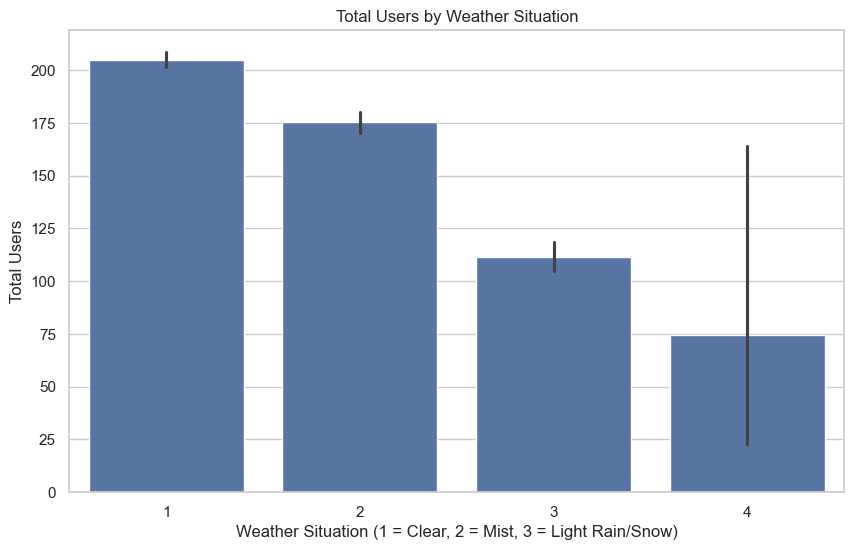

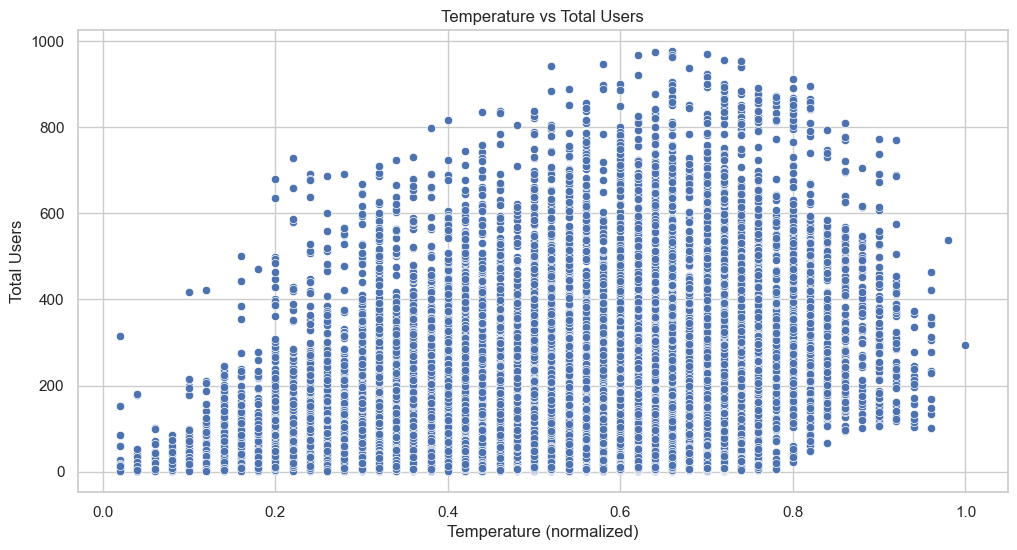

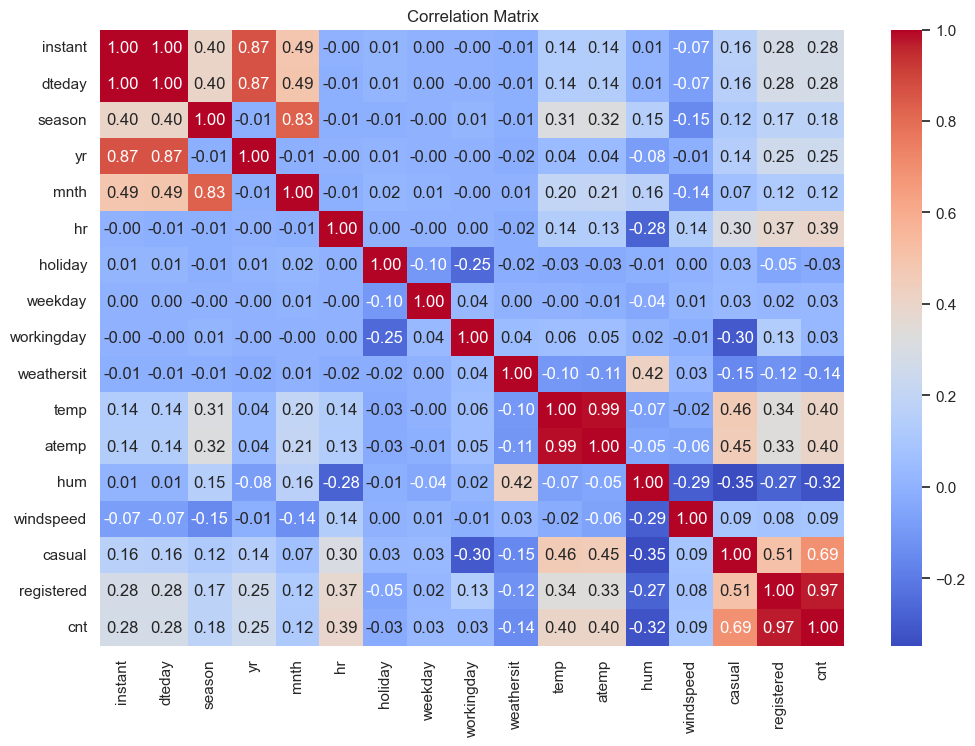

In [57]:

# Convert date column (dteday) to datetime format
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

# 1. Visualisasi Distribusi Pengguna (casual, registered, cnt) berdasarkan Jam
plt.figure(figsize=(12, 6))
sns.lineplot(x='hr', y='cnt', data=hour_df, label='Total Users')
sns.lineplot(x='hr', y='casual', data=hour_df, label='Casual Users', linestyle='--')
sns.lineplot(x='hr', y='registered', data=hour_df, label='Registered Users', linestyle='--')
plt.title('Distribution of Users by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Users')
plt.legend()
plt.show()

# 2. Distribusi Jumlah Pengguna Berdasarkan Hari dalam Seminggu (weekday)
plt.figure(figsize=(10, 6))
sns.boxplot(x='weekday', y='cnt', data=hour_df)
plt.title('Distribution of Total Users by Weekday')
plt.xlabel('Weekday (0 = Sunday, 6 = Saturday)')
plt.ylabel('Total Users')
plt.show()

# 3. Visualisasi Pengguna Berdasarkan Cuaca (weathersit)
plt.figure(figsize=(10, 6))
sns.barplot(x='weathersit', y='cnt', data=hour_df)
plt.title('Total Users by Weather Situation')
plt.xlabel('Weather Situation (1 = Clear, 2 = Mist, 3 = Light Rain/Snow)')
plt.ylabel('Total Users')
plt.show()

# 4. Pengaruh Temperatur Terhadap Jumlah Pengguna
plt.figure(figsize=(12, 6))
sns.scatterplot(x='temp', y='cnt', data=hour_df)
plt.title('Temperature vs Total Users')
plt.xlabel('Temperature (normalized)')
plt.ylabel('Total Users')
plt.show()

# 5. Korelasi antar variabel numerik
plt.figure(figsize=(12, 8))
sns.heatmap(hour_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

### Explore day_df

In [58]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
686,687,2012-11-17,4,1,11,0,6,0,1,0.325000,0.326383,0.545417,0.179729,1313,4316,5629
502,503,2012-05-17,2,1,5,0,4,1,1,0.593333,0.572613,0.520000,0.229475,1242,6142,7384
596,597,2012-08-19,3,1,8,0,0,0,2,0.635833,0.603554,0.711667,0.086450,1208,3341,4549
50,51,2011-02-20,1,0,2,0,0,0,1,0.285217,0.277330,0.407826,0.223235,639,1173,1812
156,157,2011-06-06,2,0,6,0,1,1,1,0.678333,0.621858,0.600000,0.121896,673,3875,4548


In [59]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [60]:
day_df.groupby(by="weathersit").instant.nunique().sort_values(ascending=False)

weathersit
1    463
2    247
3     21
Name: instant, dtype: int64

In [61]:
print("Rata-rata total rental sepeda per jam dalam sehari")
merged_df.groupby(by="hr").cnt_x.mean().sort_values(ascending=False).reset_index().head(10)

Rata-rata total rental sepeda per jam dalam sehari


,hr,cnt_x
0,17,461.452055
1,18,425.510989
2,8,359.011004
3,16,311.983562
4,19,311.523352
5,13,253.661180
6,12,253.315934
7,15,251.233196
8,14,240.949246
9,20,226.030220


**Insight:**
- Pada hour_df terdapat 17,379 entri, musim paling umum adalah musim panas dengan rata-rata 2.5
- Pada day_df terdapat 731 entri, musim paling umum adalah musim panas dengan nilai rata-rata mendekati 2.5

## Visualization & Explanatory Analysis

visualisasi data day_df

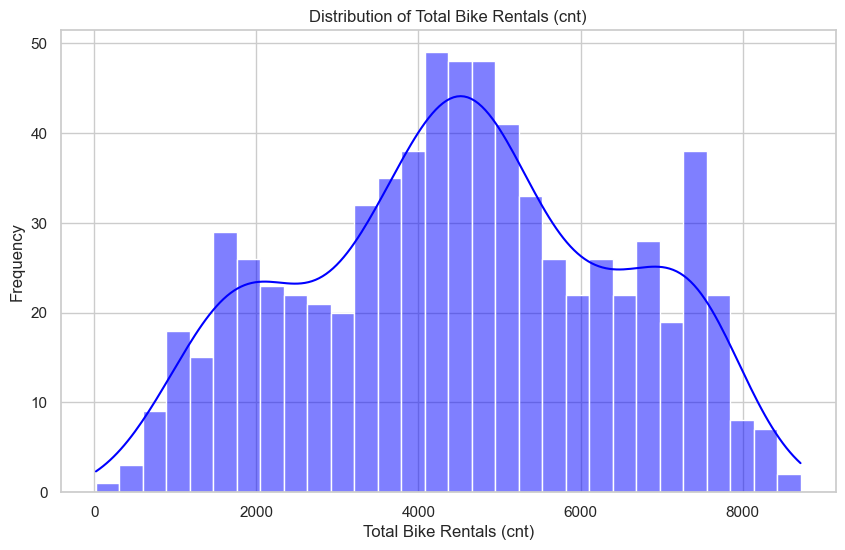

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10316\947546504.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='season', y='cnt', data=day_df, palette='Set2')


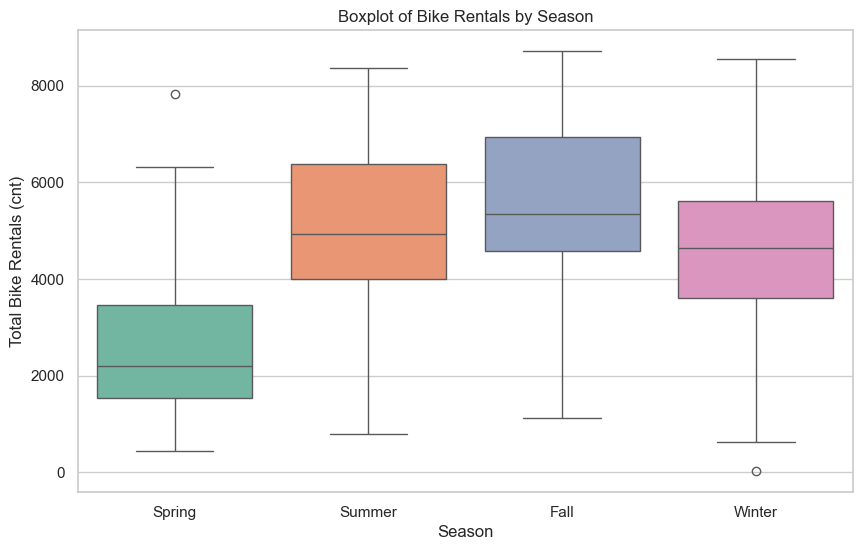

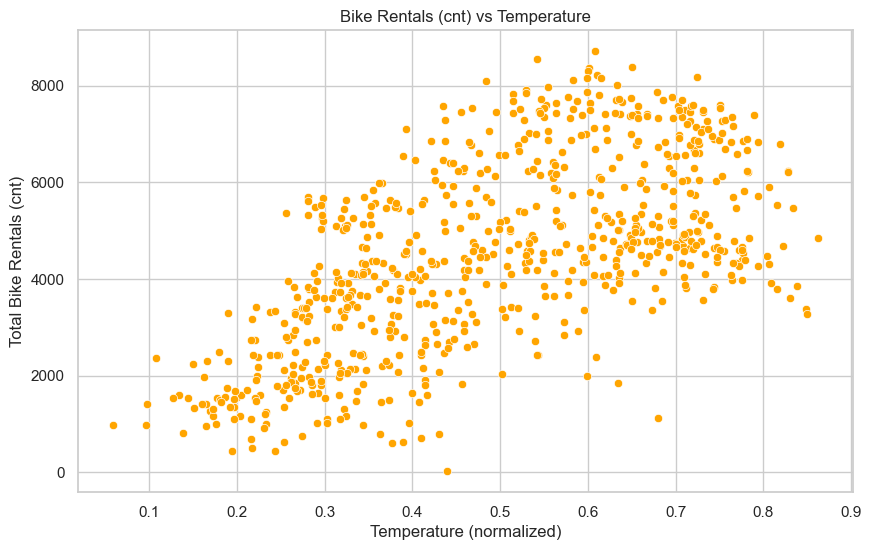

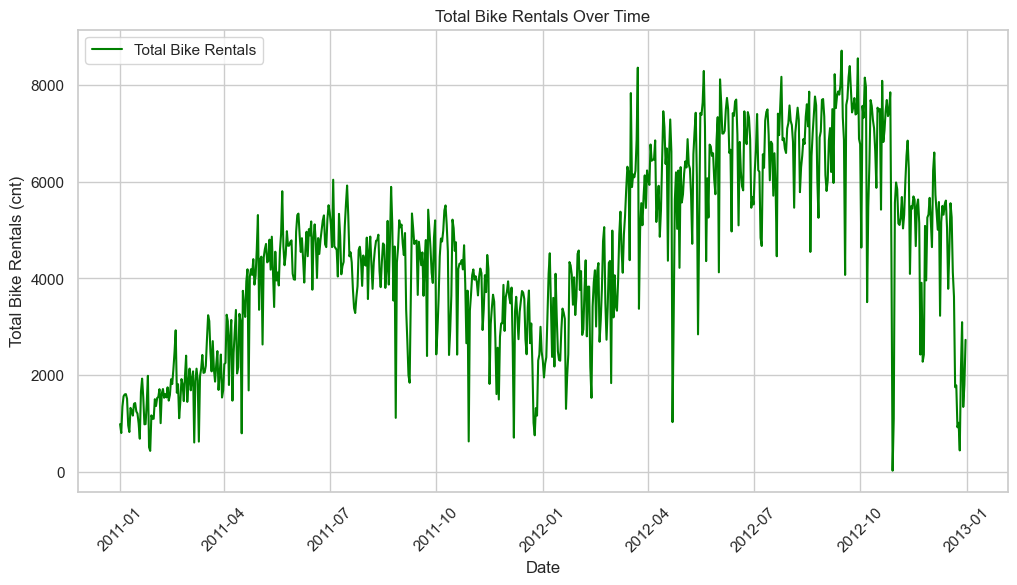

In [62]:

# Set the style of seaborn
sns.set(style='whitegrid')

# Histogram of the total count of bike rentals
plt.figure(figsize=(10, 6))
sns.histplot(day_df['cnt'], bins=30, kde=True, color='blue')
plt.title('Distribution of Total Bike Rentals (cnt)')
plt.xlabel('Total Bike Rentals (cnt)')
plt.ylabel('Frequency')
plt.show()

# Boxplot of bike rentals by season
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='cnt', data=day_df, palette='Set2')
plt.title('Boxplot of Bike Rentals by Season')
plt.xlabel('Season')
plt.ylabel('Total Bike Rentals (cnt)')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Spring', 'Summer', 'Fall', 'Winter'])
plt.show()

# Scatter plot of bike rentals vs temperature
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', data=day_df, color='orange')
plt.title('Bike Rentals (cnt) vs Temperature')
plt.xlabel('Temperature (normalized)')
plt.ylabel('Total Bike Rentals (cnt)')
plt.show()

# Time series plot of bike rentals over time
day_df['dteday'] = pd.to_datetime(day_df['dteday'])  # Convert to datetime
plt.figure(figsize=(12, 6))
plt.plot(day_df['dteday'], day_df['cnt'], label='Total Bike Rentals', color='green')
plt.title('Total Bike Rentals Over Time')
plt.xlabel('Date')
plt.ylabel('Total Bike Rentals (cnt)')
plt.xticks(rotation=45)
plt.legend()
plt.show()


### Pertanyaan 1:

Bagaimana hari libur mempengaruhi jumlah penyewaan sepeda dibandingkan dengan hari kerja

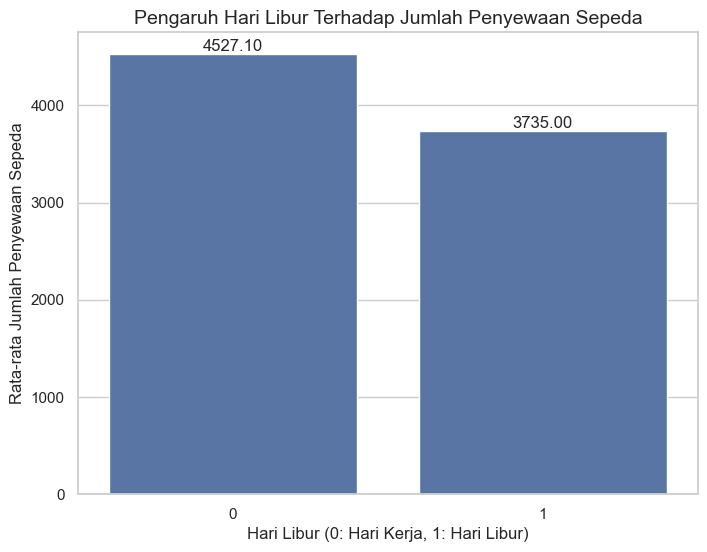

In [63]:
# Calculate the mean rental count based on holiday
holiday_workday_cnt = day_df.groupby("holiday")["cnt"].mean().reset_index()

# Create a bar plot to visualize the effect of holiday on bike rentals
plt.figure(figsize=(8, 6))
sns.barplot(data=holiday_workday_cnt, x="holiday", y="cnt")

# Set plot title and labels
plt.title("Pengaruh Hari Libur Terhadap Jumlah Penyewaan Sepeda", fontsize=14)
plt.xlabel("Hari Libur (0: Hari Kerja, 1: Hari Libur)", fontsize=12)
plt.ylabel("Rata-rata Jumlah Penyewaan Sepeda", fontsize=12)

# Add value annotations on bars
for index, value in enumerate(holiday_workday_cnt['cnt']):
    plt.text(index, value, f"{value:.2f}", ha='center', va='bottom')

plt.show()

Visualisasi di atas menunjukkan pengaruh hari libur terhadap jumlah penyewaan sepeda, dibedakan antara hari kerja dan bukan hari kerja. Dari grafik, kita dapat melihat bahwa pada hari libur, rata-rata jumlah penyewaan sepeda lebih rendah dibandingkan dengan hari kerja.

Hal ini bisa jadi karena pengguna lebih banyak menggunakan sepeda untuk keperluan sehari-hari seperti bekerja, yang lebih sering dilakukan pada hari kerja. Sementara pada hari libur, aktivitas mungkin lebih beragam dan tidak terlalu bergantung pada penggunaan sepeda.

### Pertanyaan 2: Apa perbedaan antara pengguna kasual dan pengguna terdaftar dalam hal jumlah penyewaan per hari?

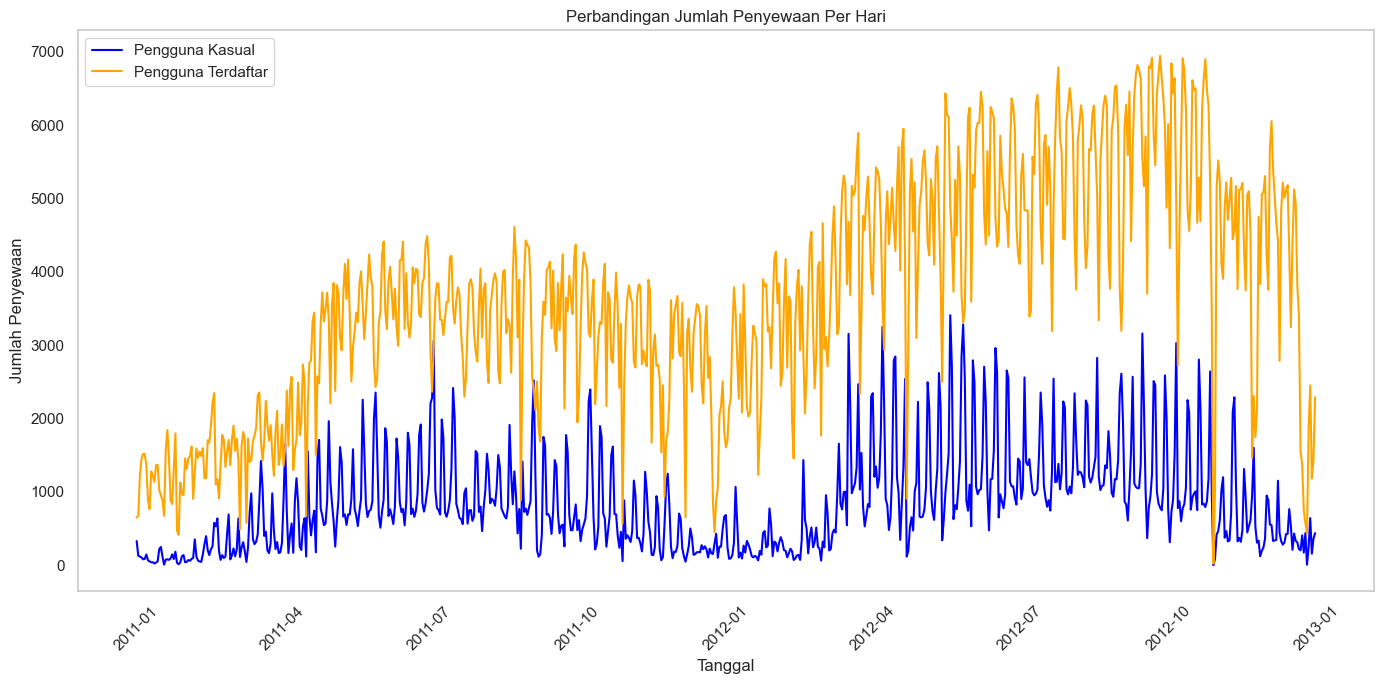

In [64]:
day_df['total_rentals'] = day_df['casual'] + day_df['registered']

# Mengelompokkan data berdasarkan tanggal dan menghitung total sewa
daily_rentals = day_df.groupby('dteday').agg({'casual': 'sum', 'registered': 'sum'}).reset_index()

# Mengubah format tanggal
daily_rentals['dteday'] = pd.to_datetime(daily_rentals['dteday'])

# Membuat visualisasi dengan seaborn
plt.figure(figsize=(14, 7))
sns.lineplot(data=daily_rentals, x='dteday', y='casual', label='Pengguna Kasual', color='blue')
sns.lineplot(data=daily_rentals, x='dteday', y='registered', label='Pengguna Terdaftar', color='orange')
plt.title('Perbandingan Jumlah Penyewaan Per Hari')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

### Kesimpulan Singkat dari Hasil Plot

1. Dominasi Pengguna Terdaftar: Pengguna terdaftar memiliki jumlah penyewaan yang lebih tinggi dan lebih konsisten dibandingkan pengguna kasual.
  
2. Fluktuasi Penyewaan Kasual: Jumlah penyewaan pengguna kasual menunjukkan fluktuasi yang lebih besar, dengan puncak pada waktu tertentu, seperti akhir pekan atau liburan.

3. Pola Musiman: Terdapat indikasi pola musiman, di mana penyewaan mungkin meningkat pada bulan-bulan tertentu, terutama saat cuaca baik.

4. Keterlibatan Stabil: Pengguna terdaftar menunjukkan keterlibatan yang lebih stabil, yang mencerminkan loyalitas terhadap layanan.

5. Rekomendasi: Perusahaan sebaiknya meningkatkan upaya pemasaran untuk pengguna kasual pada waktu-waktu tertentu untuk meningkatkan penyewaan dan potensi konversi menjadi pengguna terdaftar. 


## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1

1. Pengaruh Hari Libur: Dari plot, terlihat bahwa hari libur (nilai 1) cenderung memiliki rata-rata jumlah penyewaan sepeda yang lebih tinggi dibandingkan dengan hari kerja (nilai 0). Hal ini menunjukkan bahwa lebih banyak orang menggunakan sepeda untuk beraktivitas saat hari libur.

2. Perbedaan antara Hari Kerja dan Hari Libur: Rata-rata penyewaan pada hari libur menunjukkan lonjakan yang signifikan, terutama pada hari libur yang lebih panjang. Ini bisa menunjukkan bahwa orang lebih suka bersepeda untuk bersantai atau berolahraga pada hari libur.

3. Keterlibatan pada Hari Kerja: Meskipun ada penyewaan yang terjadi pada hari kerja, jumlahnya lebih rendah dibandingkan dengan hari libur. Ini menunjukkan bahwa kebanyakan pengguna sepeda mungkin menggunakan sepeda sebagai sarana transportasi harian, tetapi tidak sebanyak saat hari libur.

4. Rekomendasi untuk Pemasaran: Berdasarkan data ini, perusahaan dapat memanfaatkan informasi tersebut untuk mengoptimalkan kampanye pemasaran dan penawaran khusus pada hari libur, menarik lebih banyak pengguna untuk menyewa sepeda.

Dengan demikian, hasil plot ini memberikan wawasan berharga mengenai perilaku pengguna sepeda berdasarkan status hari kerja dan hari libur.




- Conclution pertanyaan 2

1. Tren Pengguna Terdaftar vs Kasual: 
   Dari plot, terlihat bahwa pengguna terdaftar (dalam garis oranye) cenderung memiliki jumlah penyewaan yang lebih tinggi dibandingkan dengan pengguna kasual (dalam garis biru) sepanjang periode yang dianalisis. Ini menunjukkan bahwa pengguna terdaftar lebih sering menggunakan layanan dibandingkan dengan pengguna kasual.

2. Fluktuasi Penyewaan: 
   Jumlah penyewaan oleh pengguna kasual menunjukkan fluktuasi yang lebih besar, dengan beberapa puncak signifikan yang mungkin terkait dengan kondisi tertentu, seperti akhir pekan atau liburan. Hal ini menunjukkan bahwa pengguna kasual lebih cenderung menyewa dalam jumlah besar pada waktu-waktu tertentu, tetapi tidak konsisten setiap hari.

3. Pola Musiman: 
   Jika ada pola musiman dalam data (misalnya, penyewaan lebih tinggi pada bulan-bulan tertentu), ini bisa terlihat dari trend jangka panjang. Misalnya, jika jumlah penyewaan meningkat pada bulan-bulan musim panas, ini bisa menunjukkan bahwa pengguna kasual lebih aktif selama waktu-waktu tersebut.

4. Keterlibatan Pengguna Terdaftar: 
   Pengguna terdaftar menunjukkan keterlibatan yang lebih stabil, dengan jumlah penyewaan yang lebih konsisten dari hari ke hari. Hal ini mungkin menunjukkan bahwa pengguna terdaftar lebih loyal terhadap layanan, yang bisa menjadi indikasi baik bagi perusahaan.

5. Rekomendasi: 
   Berdasarkan analisis ini, perusahaan bisa mempertimbangkan untuk meningkatkan upaya pemasaran dan promosi untuk pengguna kasual, terutama pada waktu-waktu tertentu ketika penyewaan mereka meningkat. Ini bisa membantu meningkatkan jumlah pengguna kasual dan berpotensi mengonversi mereka menjadi pengguna terdaftar.
